In [1]:
library(GO.db)
library(topGO)
library(GOSim)
library(org.Sc.sgd.db)
library(igraph)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [2]:
file <- "yeast_union"

ont <- "MF"
p <- 0.5
init <- 1


setOntology(ont, loadIC=FALSE)
setEvidenceLevel(evidences="all",organism=org.Sc.sgdORGANISM, gomap=org.Sc.sgdGO)

db <- org.Sc.sgd.db
mapping <- "org.Sc.sgd.db"
ID <- "ENSEMBL"

##load all community gene lists
setwd(sprintf("/home/david/Documents/ghsom/%s_communities_%s_%s", file, p, init))

#background gene list
backgroundFilename <- "all_genes.txt"
allGenes <- scan(backgroundFilename, character())

#load communities from file
g <- list()
numCom <- 0
filename <- sprintf("community_%s.txt", numCom)
while (file.exists(filename)) {
    numCom <- numCom + 1
    g[[numCom]] <- scan(filename, character())
    filename <- sprintf("community_%s.txt", numCom)
}

#distances between neurons
shortest.path <- read.csv("shortest_path.csv", sep=",", header=FALSE)

initializing GOSim package ...
-> retrieving GO information for all available genes for organism 'human' in GO database
-> filtering GO terms according to evidence levels 'all'
-> loading files with information content for corresponding GO category (human)
finished.
-> retrieving GO information for all available genes for organism 'Saccharomyces cerevisiae' in GO database
-> filtering GO terms according to evidence levels 'all'


In [3]:
numCom

[1] 52

In [4]:
allGeneNames <- scan(character(), file="../yeast_uetz_all_genes.txt")
allGenes <- allGeneNames[as.integer(allGenes)]
g <- sapply(g, function(i) allGeneNames[as.integer(i)])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [ ]:
enrichments <- sapply(g, function(i) GOenrichment(i, allGenes, cutoff=0.05, method="elim"))


Building most specific GOs .....
	( 828 GO terms found. )

Build GO DAG topology ..........
	( 1179 GO terms and 1446 relations. )

Annotating nodes ...............
	( 1567 genes annotated to the GO terms. )

			 -- Elim Algorithm -- 

		 the algorithm is scoring 127 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01

	 Level 10:	3 nodes to be scored	(0 eliminated genes)

	 Level 9:	5 nodes to be scored	(0 eliminated genes)

	 Level 8:	8 nodes to be scored	(0 eliminated genes)

	 Level 7:	16 nodes to be scored	(0 eliminated genes)

	 Level 6:	25 nodes to be scored	(5 eliminated genes)

	 Level 5:	27 nodes to be scored	(7 eliminated genes)

	 Level 4:	23 nodes to be scored	(7 eliminated genes)

	 Level 3:	14 nodes to be scored	(7 eliminated genes)

	 Level 2:	5 nodes to be scored	(7 eliminated genes)

	 Level 1:	1 nodes to be scored	(7 eliminated genes)

Building most specific GOs .....
	( 828 GO terms found. )

Build GO DAG topology ..........
	( 1179 GO term

In [ ]:
p.values <- enrichments[2,]

In [ ]:
G <- getGOGraph(names(p.values[[1]]))
G2  <-  igraph.from.graphNEL(G)
plot(G2)

In [119]:
allEnrichedGenes <- enrichments[3,]

In [120]:
getEnrichedGenes <- function(enrichedGenes){
    v <- character()
    for (i in enrichedGenes){
        v <- c(v, i[1])
    }
    return(v)
}

In [123]:
clusters <- sapply(allEnrichedGenes, function(i) getEnrichedGenes(i))

In [124]:
clusterSim <- mclusterSim(clusters = clusters, semData = scGO, measure = "Wang", combine = "BMA")

In [126]:
head(clusterSim)
head(shortest.path)

1.000,0.114,0.284,0.271,0.168,0.278,0.393,0.230,0.263,0.276,⋯,0.227,0.265,0.117,0.214,0.340,0.134,0.241,0.402,0.248,0.181
0.114,1.000,0.150,0.248,0.540,0.201,0.086,0.081,0.096,0.251,⋯,0.094,0.111,0.068,0.080,0.078,0.081,0.077,0.125,0.194,0.057
0.284,0.150,1.000,0.433,0.207,0.442,0.392,0.293,0.262,0.377,⋯,0.224,0.413,0.238,0.323,0.298,0.228,0.351,0.252,0.385,0.221
0.271,0.248,0.433,1.000,0.252,0.321,0.226,0.178,0.181,0.519,⋯,0.298,0.418,0.117,0.185,0.203,0.228,0.153,0.351,0.360,0.123
0.168,0.540,0.207,0.252,1.000,0.259,0.127,0.118,0.138,0.224,⋯,0.128,0.171,0.099,0.123,0.114,0.134,0.112,0.210,0.218,0.085
0.278,0.201,0.442,0.321,0.259,1.000,0.306,0.263,0.284,0.310,⋯,0.230,0.361,0.238,0.264,0.272,0.189,0.227,0.289,0.326,0.179


GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266,GO:0030145,GO:0001102
0,3,4,1,5,7,1,4,6,7,⋯,1,1,6,6,8,3,4,5,6,7
3,0,1,4,2,4,4,1,3,4,⋯,4,4,3,3,5,4,1,2,3,4
4,1,0,5,3,5,5,2,4,5,⋯,5,5,4,4,6,5,2,3,4,5
1,4,5,0,6,8,2,5,7,8,⋯,2,2,7,7,9,4,5,6,7,8
5,2,3,6,0,6,6,3,5,5,⋯,6,6,5,5,7,6,2,3,3,4
7,4,5,8,6,0,8,5,1,8,⋯,8,8,7,3,3,8,5,6,7,8


In [68]:
lengths(p.values)

[1] 11  2 17 13  3  4  7 11  1 15  9  0  4 25  4  0 15 17  8  2  3  8  1  6  2
[26]  9  6  4  1  3 14  4 11  3 10 10 17  5 14  9 12  5  5  0  0  6  1  2  3 23
[51]  6

In [69]:
shortest.path <- shortest.path[lengths(p.values) > 0, lengths(p.values) > 0]

In [70]:
p.values <- p.values[sapply(p.values, function(i) length(i) > 0)]

In [71]:
lengths(p.values)

[1] 11  2 17 13  3  4  7 11  1 15  9  4 25  4 15 17  8  2  3  8  1  6  2  9  6
[26]  4  1  3 14  4 11  3 10 10 17  5 14  9 12  5  5  6  1  2  3 23  6

In [129]:
minGO <- sapply(p.values, function(i) names(i)[which.min(i)])
maxGO <- sapply(p.values, function(i) names(i)[which.max(i)])

In [130]:
select(GO.db, keys=minGO, columns=c("TERM","DEFINITION"))

'select()' returned many:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0005546,"phosphatidylinositol-4,5-bisphosphate binding","Interacting selectively and non-covalently with phosphatidylinositol-4,5-bisphosphate, a derivative of phosphatidylinositol in which the inositol ring is phosphorylated at the 4' and 5' positions."
GO:0004003,ATP-dependent DNA helicase activity,Catalysis of the reaction: ATP + H2O = ADP + phosphate; this reaction drives the unwinding of the DNA helix.
GO:0032183,SUMO binding,Interacting selectively and non-covalently with the small ubiquitin-like protein SUMO.
GO:0016829,lyase activity,"Catalysis of the cleavage of C-C, C-O, C-N and other bonds by other means than by hydrolysis or oxidation, or conversely adding a group to a double bond. They differ from other enzymes in that two substrates are involved in one reaction direction, but only one in the other direction. When acting on the single substrate, a molecule is eliminated and this generates either a new double bond or a new ring."
GO:0015616,DNA translocase activity,"Catalysis of the reaction: ATP + H2O = ADP + phosphate, to drive movement along a single- or double-stranded DNA molecule."
GO:0004845,uracil phosphoribosyltransferase activity,Catalysis of the reaction: diphosphate + UMP = 5-phospho-alpha-D-ribose 1-diphosphate + uracil.
GO:0004373,glycogen (starch) synthase activity,"Catalysis of the reaction: UDP-glucose + (1,4)-alpha-D-glucosyl(n) = UDP + (1,4)-alpha-D-glucosyl(n+1)."
GO:0001227,"transcriptional repressor activity, RNA polymerase II transcription regulatory region sequence-specific binding","Interacting selectively and non-covalently with a sequence of DNA that is in the regulatory region for RNA polymerase II (RNAP II) in order to stop, prevent, or reduce the frequency, rate or extent of transcription from an RNA polymerase II promoter."
GO:0017056,structural constituent of nuclear pore,The action of a molecule that contributes to the structural integrity of the nuclear pore complex.
GO:0003729,mRNA binding,"Interacting selectively and non-covalently with messenger RNA (mRNA), an intermediate molecule between DNA and protein. mRNA includes UTR and coding sequences, but does not contain introns."


In [131]:
select(GO.db, keys=maxGO, columns=c("TERM","DEFINITION"))

'select()' returned many:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0032934,sterol binding,"Interacting selectively and non-covalently with a sterol, any steroid containing a hydroxy group in the 3 position, closely related to cholestan-3-ol."
GO:0004003,ATP-dependent DNA helicase activity,Catalysis of the reaction: ATP + H2O = ADP + phosphate; this reaction drives the unwinding of the DNA helix.
GO:0032041,NAD-dependent histone deacetylase activity (H3-K14 specific),"Catalysis of the reaction: histone H3 N6-acetyl-L-lysine (position 14) + H2O = histone H3 L-lysine (position 14) + acetate. This reaction requires the presence of NAD, and represents the removal of an acetyl group from lysine at position 14 of the histone H3 protein."
GO:0016835,carbon-oxygen lyase activity,Catalysis of the breakage of a carbon-oxygen bond.
GO:0015616,DNA translocase activity,"Catalysis of the reaction: ATP + H2O = ADP + phosphate, to drive movement along a single- or double-stranded DNA molecule."
GO:0016763,"transferase activity, transferring pentosyl groups",Catalysis of the transfer of a pentosyl group from one compound (donor) to another (acceptor).
GO:0003779,actin binding,"Interacting selectively and non-covalently with monomeric or multimeric forms of actin, including actin filaments."
GO:1990837,sequence-specific double-stranded DNA binding,"Interacting selectively and non-covalently with double-stranded DNA of a specific nucleotide composition, e.g. GC-rich DNA binding, or with a specific sequence motif or type of DNA, e.g. promotor binding or rDNA binding."
GO:0017056,structural constituent of nuclear pore,The action of a molecule that contributes to the structural integrity of the nuclear pore complex.
GO:0030145,manganese ion binding,Interacting selectively and non-covalently with manganese (Mn) ions.


In [132]:
head(shortest.path)

GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266,GO:0030145,GO:0001102
0,3,4,1,5,7,1,4,6,7,⋯,1,1,6,6,8,3,4,5,6,7
3,0,1,4,2,4,4,1,3,4,⋯,4,4,3,3,5,4,1,2,3,4
4,1,0,5,3,5,5,2,4,5,⋯,5,5,4,4,6,5,2,3,4,5
1,4,5,0,6,8,2,5,7,8,⋯,2,2,7,7,9,4,5,6,7,8
5,2,3,6,0,6,6,3,5,5,⋯,6,6,5,5,7,6,2,3,3,4
7,4,5,8,6,0,8,5,1,8,⋯,8,8,7,3,3,8,5,6,7,8


In [75]:
colnames(shortest.path) <- maxGO
rownames(shortest.path) <- maxGO

Warning message:
“non-unique values when setting 'row.names': ‘GO:0001102’, ‘GO:0017056’, ‘GO:0022890’, ‘GO:0030145’”

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = value): duplicate 'row.names' are not allowed


In [76]:
library(GOSemSim)

In [77]:
scGO <- godata(ont = ont, OrgDb = mapping, keytype = ID)

[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [78]:
semSimGO <- mgoSim(maxGO, maxGO, semData=scGO, measure="Wang", combine=NULL)

In [79]:
head(semSimGO)
head(shortest.path)

,GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0019207,GO:0008121,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266
GO:0032934,1.000,0.041,0.052,0.110,0.052,0.093,0.209,0.242,0.133,0.161,⋯,0.110,0.058,0.055,0.078,0.110,0.110,0.110,0.049,0.209,0.253
GO:0004003,0.041,1.000,0.091,0.135,0.607,0.109,0.048,0.030,0.075,0.034,⋯,0.060,0.069,0.025,0.075,0.060,0.060,0.060,0.048,0.048,0.032
GO:0032041,0.052,0.091,1.000,0.171,0.109,0.141,0.063,0.040,0.095,0.045,⋯,0.076,0.088,0.034,0.096,0.076,0.076,0.076,0.066,0.063,0.042
GO:0016835,0.110,0.135,0.171,1.000,0.185,0.328,0.146,0.095,0.214,0.112,⋯,0.173,0.186,0.083,0.206,0.173,0.173,0.173,0.165,0.146,0.101
GO:0015616,0.052,0.607,0.109,0.185,1.000,0.147,0.065,0.038,0.107,0.043,⋯,0.082,0.083,0.031,0.092,0.082,0.082,0.082,0.057,0.065,0.040
GO:0016763,0.093,0.109,0.141,0.328,0.147,1.000,0.122,0.079,0.181,0.092,⋯,0.146,0.157,0.068,0.272,0.146,0.146,0.146,0.228,0.122,0.083


GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266,GO:0030145,GO:0001102
0,3,4,1,5,7,1,4,6,7,⋯,1,1,6,6,8,3,4,5,6,7
3,0,1,4,2,4,4,1,3,4,⋯,4,4,3,3,5,4,1,2,3,4
4,1,0,5,3,5,5,2,4,5,⋯,5,5,4,4,6,5,2,3,4,5
1,4,5,0,6,8,2,5,7,8,⋯,2,2,7,7,9,4,5,6,7,8
5,2,3,6,0,6,6,3,5,5,⋯,6,6,5,5,7,6,2,3,3,4
7,4,5,8,6,0,8,5,1,8,⋯,8,8,7,3,3,8,5,6,7,8


In [80]:
termSim <- getTermSim(maxGO, method = "Resnik")

In [81]:
head(termSim)
head(shortest.path)

,GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266,GO:0030145,GO:0001102
GO:0032934,NA,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GO:0004003,0,NA,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GO:0032041,0,0,NA,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GO:0016835,0,0,0,NA,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GO:0015616,0,0,0,0,NA,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GO:0016763,0,0,0,0,0,NA,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


GO:0032934,GO:0004003,GO:0032041,GO:0016835,GO:0015616,GO:0016763,GO:0003779,GO:1990837,GO:0017056,GO:0030145,⋯,GO:0015179,GO:0004702,GO:0099600,GO:0008047,GO:0001076,GO:0042800,GO:0043130,GO:0032266,GO:0030145,GO:0001102
0,3,4,1,5,7,1,4,6,7,⋯,1,1,6,6,8,3,4,5,6,7
3,0,1,4,2,4,4,1,3,4,⋯,4,4,3,3,5,4,1,2,3,4
4,1,0,5,3,5,5,2,4,5,⋯,5,5,4,4,6,5,2,3,4,5
1,4,5,0,6,8,2,5,7,8,⋯,2,2,7,7,9,4,5,6,7,8
5,2,3,6,0,6,6,3,5,5,⋯,6,6,5,5,7,6,2,3,3,4
7,4,5,8,6,0,8,5,1,8,⋯,8,8,7,3,3,8,5,6,7,8


In [82]:
#gene sims as dataframe
t <- getGeneSim(g[[1]], g[[2]], similarity="max", similarityTerm="Resnik", normalization=TRUE)

filtering out genes not mapping to the currently set GO category ... ===> list of  8 genes reduced to  7 
filtering out genes not mapping to the currently set GO category ... ===> list of  20 genes reduced to  19 


In [83]:
t

,YDR078C,YHR140W,YPL229W,YDR510W,YER092W,YNL288W,YJL065C,YFR047C,YKL075C,YIL172C,YDR151C,YDL012C,YHR032W,YNL091W,YGL150C,YJL092W,YHL046C,YNL164C,YDL002C
YER179W,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YIL105C,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YMR068W,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YDR326C,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YNL047C,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YPL059W,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YOR353C,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [19]:
fall <- function(i) !all(is.na(i))
fany <- function(i) !any(is.na(i))
##remove na columns and rows
s <- t[apply(t, 1, fall), apply(t, 2, fall)]
##remove any remaining rows with nan
s <- s[apply(s, 1, fany),]

In [20]:
s

<0 x 0 matrix>

In [ ]:
##BMA
((sum(apply(s, 1, max)) + sum(apply(s, 2, max))) / (nrow(s) + ncol(s)))

In [42]:
fall <- function(i) !all(is.na(i))
fany <- function(i) !any(is.na(i))
    
l = 2    

geneSims <- sapply(1:l, function(i) {
    sapply(i:l, function(j){
        if (i == j){
            return(1)
        } else {
            #gene sims as dataframe
            t <- getGeneSim(g[[i]], g[[j]], similarity="max", similarityTerm="Resnik", normalization=TRUE)
            ##remove na columns and rows
            t <- t[apply(t, 1, fall), apply(t, 2, fall)]
            ##remove any remaining rows with nan
            t <- t[apply(t, 1, fany),]
            ##BMA
            return((sum(apply(t, 1, max)) + sum(apply(t, 2, max))) / (nrow(t) + ncol(t)))
        }
       
    })
})

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  121 
filtering out genes not mapping to the currently set GO category ... ===> list of  114 genes reduced to  109 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

In [43]:
head(geneSims)

[[1]]
[1]  1.00000 48.55923

[[2]]
[1] 1

In [44]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1,1,1,1,2,1,2,2,2,3
1,0,1,2,2,2,1,1,2,2,3
1,1,0,1,1,1,2,2,1,3,2
1,2,1,0,2,2,2,3,2,3,3
1,2,1,2,0,1,2,3,2,3,2
2,2,1,2,1,0,3,3,1,4,1


In [31]:
geneSimsDF <- sapply(1:length(geneSims), function(i) {
    sapply(1:length(geneSims), function(j) {
        if (j >= i){
            mean(geneSims[[i]][[j]])
        } else{
            mean(geneSims[[j]][[i]])
        }
        
    })
})

ERROR: Error in geneSims[[i]][[j]]: subscript out of bounds


In [ ]:
i <- 1
j <- 3
getGeneSim(g[[i]], g[[j]], similarity="max", similarityTerm="relevance")

In [8]:
maxGoSimilarity <- function(gos1, gos2) {
    max(sapply(gos1, function(i) {
        sapply(gos2, function(j) {
            getTermSim(c(i, j), method="relevance")[1, 2]
        })
    }))
}

In [12]:
clusterGoSimilarities <- sapply(1:length(p.values), function(i) {
    sapply(1:length(p.values), function(j){
        maxGoSimilarity(names(p.values[[i]]), names(p.values[[j]]))
    })
})

In [13]:
head(clusterGoSimilarities)

1.0286923,0.6695515,1.1221979,0.8384995,1.1237218,0.8602779,0.6995178,1.2028712,0.9266010,1.1237218,0.7255790
0.6695515,0.9999892,0.6625181,0.4919451,0.6630489,0.8664432,0.5593290,0.6898319,0.7281402,0.6630489,0.4735249
1.1221979,0.6625181,1.0955037,0.8236205,1.1625049,0.8446231,0.7102348,1.2696533,1.3413922,1.1625049,0.7702739
0.8384995,0.4919451,0.8236205,0.9999892,1.0809223,0.8578494,0.9006091,0.9912843,1.1872736,0.8247358,0.7658848
1.1237218,0.6630489,1.1625049,1.0809223,0.9999892,0.9984468,0.7761950,1.1820451,1.0708959,1.0372669,0.9137335
0.8602779,0.8664432,0.8446231,0.8578494,0.9984468,0.9999569,0.8098048,0.9068231,0.7818790,0.9984468,0.6960438


In [88]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
0,1,1,1,1,1,2,1,2,2,2,2,3,3,2,3,2,3,3,4
1,0,1,1,2,2,1,1,1,1,1,1,2,2,1,2,1,2,2,3
1,1,0,2,2,1,1,2,2,2,2,2,3,3,2,2,2,3,3,4
1,1,2,0,1,2,2,2,2,2,2,2,3,3,2,3,2,3,3,4
1,2,2,1,0,2,3,2,3,3,3,3,4,4,3,4,3,4,4,5
1,2,1,2,2,0,2,2,3,3,3,3,4,4,3,3,3,4,4,5


In [14]:
distances <- numeric(length = (numCom * (numCom - 1)) / 2)
semSims <- numeric(length = (numCom * (numCom - 1)) / 2)

completed <- 0

for (c1 in 1:length(g)) {
    
    for (c2 in c1:length(g)) {
        
        if (c1 == c2) next   
        
        completed <- completed + 1  
        semSims[completed] <- clusterGoSimilarities[c1, c2]
            
        distances[completed] <- shortest.path[c1, c2]
        
        print(sprintf("Completed: %s", completed))
    }
}

[1] "Completed: 1"
[1] "Completed: 2"
[1] "Completed: 3"
[1] "Completed: 4"
[1] "Completed: 5"
[1] "Completed: 6"
[1] "Completed: 7"
[1] "Completed: 8"
[1] "Completed: 9"
[1] "Completed: 10"
[1] "Completed: 11"
[1] "Completed: 12"
[1] "Completed: 13"
[1] "Completed: 14"
[1] "Completed: 15"
[1] "Completed: 16"
[1] "Completed: 17"
[1] "Completed: 18"
[1] "Completed: 19"
[1] "Completed: 20"
[1] "Completed: 21"
[1] "Completed: 22"
[1] "Completed: 23"
[1] "Completed: 24"
[1] "Completed: 25"
[1] "Completed: 26"
[1] "Completed: 27"
[1] "Completed: 28"
[1] "Completed: 29"
[1] "Completed: 30"
[1] "Completed: 31"
[1] "Completed: 32"
[1] "Completed: 33"
[1] "Completed: 34"
[1] "Completed: 35"
[1] "Completed: 36"
[1] "Completed: 37"
[1] "Completed: 38"
[1] "Completed: 39"
[1] "Completed: 40"
[1] "Completed: 41"
[1] "Completed: 42"
[1] "Completed: 43"
[1] "Completed: 44"
[1] "Completed: 45"
[1] "Completed: 46"
[1] "Completed: 47"
[1] "Completed: 48"
[1] "Completed: 49"
[1] "Completed: 50"
[1] "Comp

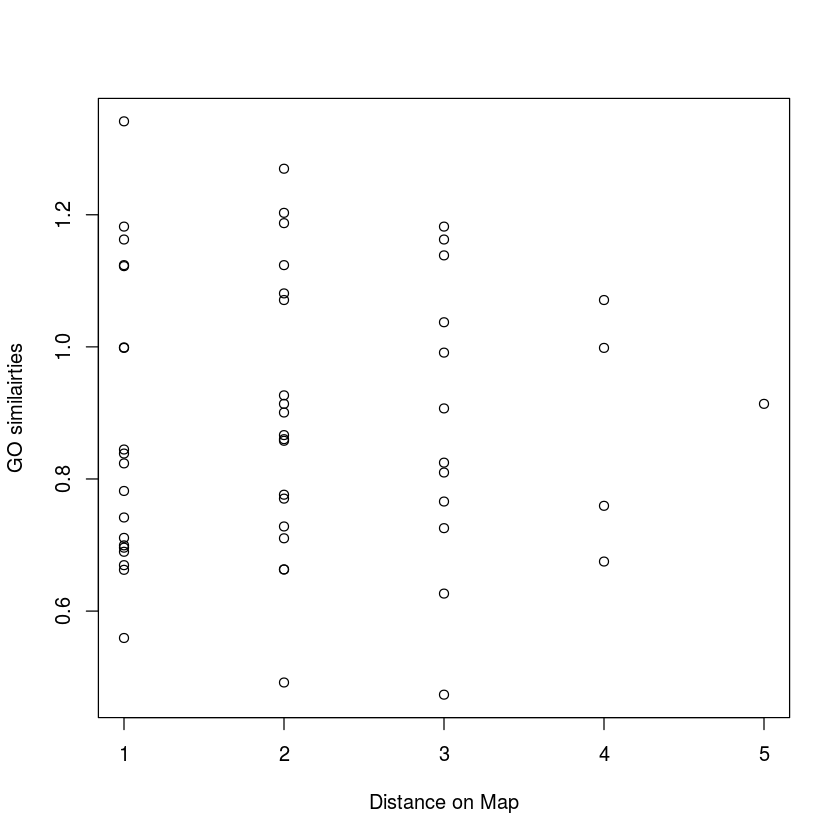

In [15]:
plot(distances, semSims, xlab="Distance on Map", ylab="GO similairties")